### 一、Pytorch的建模流程
使用Pytorch实现神经网络模型的一般流程包括：

1，准备数据

2，定义模型

3，训练模型

4，评估模型

5，使用模型

6，保存模型。


* 结构化数据：Titanic生存预测
* 图像数据：Cifar图片分类
* 文本数据：imdb电影评论分类问题
* 时间序列数据：国内新冠疫情结束时间预测问题为例

#### 1-1 结构化数据建模流程范例

In [1]:
import os
import datetime

# 打印时间
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)

### 一、准备数据
Titanic数据集的目标是根据乘客信息预测他们在Titanic号撞击冰山沉没后能否生存。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

df_train_raw = pd.read_csv('./data/titanic/train.csv')
df_test_raw = pd.read_csv('./data/titanic/test.csv')

df_train_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


#### 字段说明：
* `PassengerId`：乘客ID；
* `Survived`：0代表死亡，1代表存活（y标签）；
* `Pclass`：乘客所持票类，（1,2,3）----【转换为onehot编码】；
* `Name`：乘客名字（可不用）；
* `Sex`:乘客性别-----【转换为bool特征】；
* `Age`：乘客年龄（有缺失-----【数值特征，并添加“年龄是否缺失”作为辅助特征】；
* `SibSp`：乘客兄弟姐妹/配偶的个数（整数值）----【数值特征】；
* `Parch`：乘客父母/孩子的个数（整数值）----【数值特征】；
* `Ticket`：票号（可不用）；
* `Fare`：乘客所持票的价格（浮点数，0-500不等）【数值特征】；
* `Cabin`：乘客所在船舱（有缺失）----【添加“所在船舱是否缺失”作为辅助特征】
* `Embarked`：乘客登船港口：S、C、Q（有缺失）----【转换为onehot编码，四维度S，C，Q,nan】

利用`Pandas`数据可视化进行探索性数据分析EDA(Exploratory Data Analysis)。


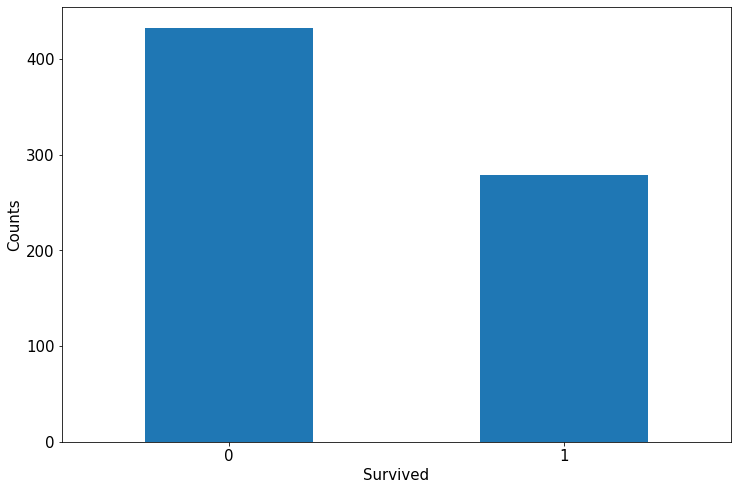

In [4]:
#label分布情况
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# 对训练数据存活情况进行值统计，并可视化，查看乘客存活状态

ax = df_train_raw['Survived'].value_counts().plot(kind='bar', figsize=(12,8), fontsize=15, rot=0)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Survived', fontsize=15)
plt.show()


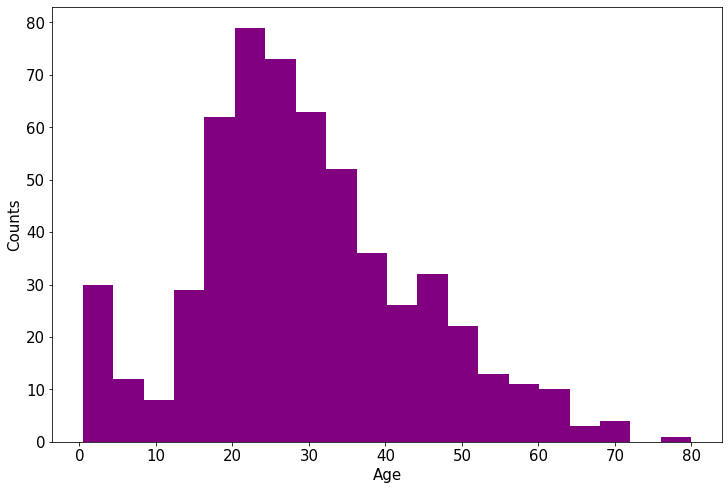

In [7]:
# 年龄分布情况

%matplotlib inline
%config InlineBackend.figure_format = 'png'

ax = df_train_raw['Age'].plot(kind='hist', bins=20,color='purple',figsize=(12,8), fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()


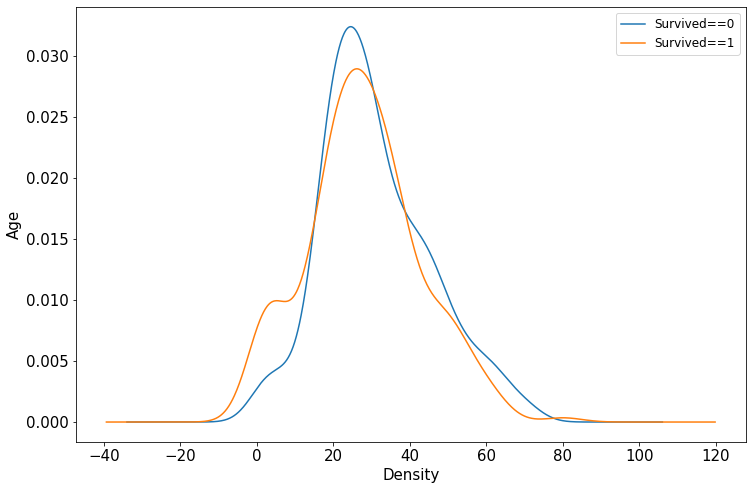

In [10]:
# 年龄和label的相关性

%matplotlib inline
%config InlineBackend.figure_format = 'png'

# 使用query进行查询：查询存活或者不存活的年龄分布
ax = df_train_raw.query('Survived==0')['Age'].plot(kind='density', figsize=(12,8), fontsize=15)
df_train_raw.query('Survived==1')['Age'].plot(kind='density', figsize=(12,8), fontsize=15)

ax.legend(['Survived==0', 'Survived==1'], fontsize=12)
ax.set_xlabel('Density', fontsize=15)
ax.set_ylabel('Age', fontsize=15)
plt.show()
